# Desafío Spike



# Bajar archivo

Para bajar el archivo se puede desde Github o Bigquery. Para utilizar pandas con Bigquery es necesario instalar pandas-gbq.

In [1]:
!pip install pandas-gbq
!pip install geopandas
!pip install seaborn

# 1. Bajar el archivo caudal_extra.csv

In [2]:
# Paso 1
import pandas as pd
import seaborn as sns

source = 'Github'

if source == 'Github':
    data = pd.read_csv('https://github.com/SpikeLab-CL/desafio_spike_cuencas/raw/master/caudal_extra.csv.zip').sort_values('fecha')
elif source == 'Bigquery':
    data = pd.read_gbq("SELECT * FROM public.caudal_extra_min", project_id="spikelab")

In [3]:
data['fecha'] = pd.to_datetime(data['fecha'])
data['anio'] = data['fecha'].dt.year


# 2. Análisis del dataset

Lo primero que se puede hacer es visualizar que información tiene. Para ello haré un head y un describe simple:

In [4]:
data.head()

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,anio
1119288,1119288,4523002,DGA,dga_web,Rio Grande En Puntilla San Juan,420,-30.704700,-70.924400,45,Rio Grande Medio (Arriba Junta Rapel Y E Paloma),25038,1960-01-02 00:00:00+00:00,6.23,4523002,Rio Grande En Puntilla San Juan,0.0,NaN,1960
454431,454431,5423003,DGA,dga_web,Rio Aconcagua En Romeral,365,-32.840302,-71.025597,54,Aconcagua Bajo,11305,1960-01-02 00:00:00+00:00,88.90,5423003,Rio Aconcagua En Romeral,0.0,NaN,1960
995307,995307,8106001,DGA,dga_web,Rio ÑUble En San Fabian,410,-36.570301,-71.554703,81,Rio Nuble Alto (Hasta Bajo Junta Estero Pangue),17940,1960-01-02 00:00:00+00:00,118.00,8106001,Rio ÑUble En San Fabian,0.0,NaN,1960
1023632,1023632,4716001,DGA,dga_web,Rio Choapa En Lamahuida,275,-31.742201,-71.149200,47,Rio Choapa Medio (Entre Rios Cuncumen E Illapel),7410,1960-01-02 00:00:00+00:00,2.19,4716001,Rio Choapa En Lamahuida,0.0,NaN,1960
1158812,1158812,8132001,DGA,dga_web,Rio Diguillin En Longitudinal,80,-36.866699,-72.333298,81,Rio Itata Medio (Entre Rio Renegado Y Rio Nuble),17388,1960-01-02 00:00:00+00:00,1.10,8132001,Rio Diguillin En Longitudinal,0.0,NaN,1960


In [5]:
data.describe()

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio,anio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06,1.411180e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01,1.994152e+03
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00,1.570905e+01
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01,1.960000e+03
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01,1.982000e+03
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01,1.997000e+03
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01,2.007000e+03
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01,2.018000e+03


Llama la atención que el máximo del caudal sea tan alto comparado con el del 75%. Es útil revisar si hay outliers.

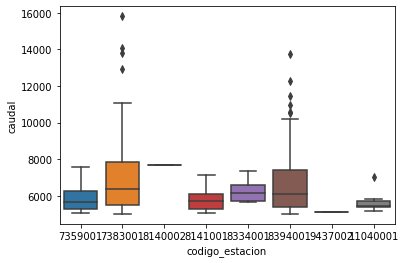

In [6]:
ax = sns.boxplot(x="codigo_estacion", y="caudal", data=data[(data['caudal']>5000)].reset_index())

Las medidas altas son comparables con los valores que normalmente tiene, y como se están detectando condiciones anómalas no se quitarán del dataset.

Tal cual como se describe en el pdf, son datos de diferentes cuencas. Es importante visualizar por cada estación que datos hay. Principalmente determinar si hay días faltantes, información con valores NaN, etc.

In [7]:
grouped_data = data[['fecha','codigo_estacion','temp_max_promedio', 'precip_promedio', 'caudal']].groupby(['codigo_estacion'])

info_data = pd.DataFrame()
info_data['precip_promedio_count'] = grouped_data['precip_promedio'].count()
info_data['caudal_count'] = grouped_data['caudal'].count()
info_data['temp_max_promedio_count'] = grouped_data['temp_max_promedio'].count()

# missing data
info_data['precip_promedio_missing'] = grouped_data['codigo_estacion'].count() - grouped_data['precip_promedio'].count()
info_data['caudal_count_missing'] = grouped_data['codigo_estacion'].count() - grouped_data['caudal'].count()
info_data['temp_max_promedio_count_missing'] = grouped_data['codigo_estacion'].count() - grouped_data['temp_max_promedio'].count()

info_data['first_measurement'] = grouped_data['fecha'].first()
info_data['last_measurement'] = grouped_data['fecha'].last()

info_data


,precip_promedio_count,caudal_count,temp_max_promedio_count,precip_promedio_missing,caudal_count_missing,temp_max_promedio_count_missing,first_measurement,last_measurement
codigo_estacion,,,,,,,,
1020003,12194,12194,11141,0,0,1053,1963-04-01 00:00:00+00:00,2017-07-31 00:00:00+00:00
1021001,12043,12043,9534,0,0,2509,1963-04-11 00:00:00+00:00,2017-09-30 00:00:00+00:00
1050004,10843,10943,10411,100,0,532,1981-02-11 00:00:00+00:00,2017-09-30 00:00:00+00:00
1211001,8750,8780,7048,30,0,1732,1985-01-01 00:00:00+00:00,2018-03-09 00:00:00+00:00
2103003,2596,2596,2563,0,0,33,1979-10-04 00:00:00+00:00,1989-03-30 00:00:00+00:00
2104002,13159,13159,12820,0,0,339,1976-02-12 00:00:00+00:00,2017-07-31 00:00:00+00:00
2104003,9131,9131,9091,0,0,40,1979-08-26 00:00:00+00:00,2006-03-28 00:00:00+00:00
2105001,13251,13251,13185,0,0,66,1975-12-23 00:00:00+00:00,2017-07-31 00:00:00+00:00
2105002,13495,13495,13486,0,0,9,1975-03-23 00:00:00+00:00,2018-02-15 00:00:00+00:00


Hay cuencas (o estaciones) en las cuales las mediciones se iniciaron hace mucho tiempo y otras desde hace muy poco, lo cual genera que haya muchas mediciones para algunas y otras no.

También se puede notar que la mayoría de las mediciones faltantes son de la temperatura máxima, seguida de los valores de precipitación. Esto es debido a que, como se indica en el enunciado del problema, viene de fuentes distintas (las estaciones de medición son de CAUDAL).

# 3.a Plot de una estación dada una columna y rango de fechas

In [8]:
data.set_index('fecha', inplace=True)

C:\Users\Felipe\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
C:\Users\Felipe\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


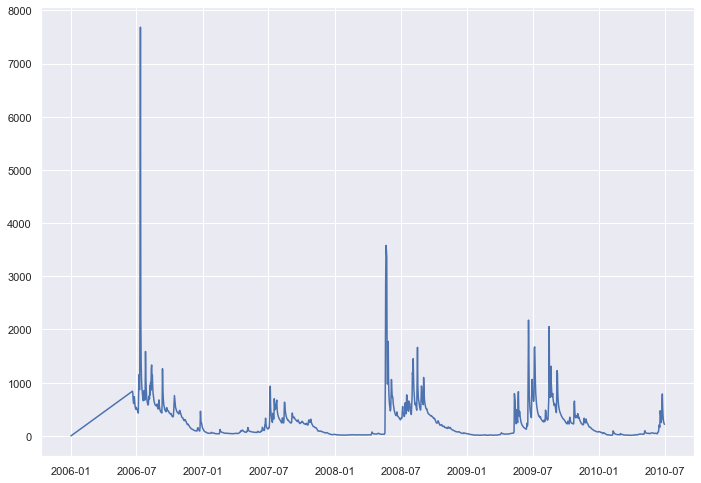

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    
    # filtrar por codigo_estacion y fecha_min y fecha_max
    df = data[(data['codigo_estacion'] == codigo_estacion)].sort_values(by=['fecha'])

    df = df.loc[fecha_min:fecha_max]
    df = df[columna]
    ax = sns.lineplot(data=df)
    
time_plot_una_estacion(8140002,'caudal', '1990-01-06', '2010-06-30')


# 3.b Plot de una estación dada varias columna y rango de fechas
La función anterior acepta como argumento columna como lista, por lo que hace un plot con todas las columnas que encuentre
> time_plot_una_estacion(4540001,['caudal','precip_promedio','temp_max_promedio'], '1960-01-06', '1970-06-30')

se editará solo cambiandole la normalización haciendo una división por el valor máximo en el período dado

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  self.obj[key] = _infer_fill_value(value)
C:\Users\Felipe\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


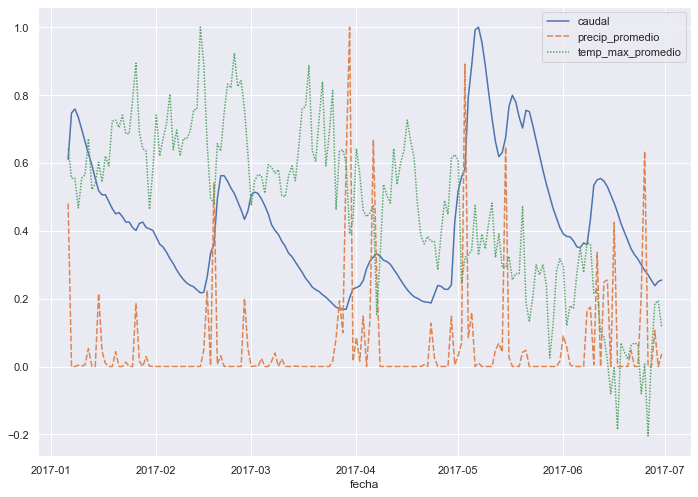

In [10]:
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    
    # filtrar por codigo_estacion y fecha_min y fecha_max
    df = data[(data['codigo_estacion'] == codigo_estacion)].sort_values(by=['fecha'])

    df = df.loc[fecha_min:fecha_max]
    df = df[columnas]
    
    # normalizacion dividiendo por el máximo
    df = df.divide(df.max().values)
    ax = sns.lineplot(data=df)

time_plot_estaciones_varias_columnas(11335002,['caudal','precip_promedio','temp_max_promedio'], '2017-01-06', '2017-06-30')

# 4.- Generar las variables de caudal/temperatura/precipitación extremos

Se considerará para el desafío los valores sobre el percentil 95, agrupados por estación del año y por estación de medición. Esta medida es razonable, pero depende de lo que se defina por extremo.

Si ocupara la definición "extremo" como una subida intempestiva o repentina desde el punto anterior. Esto no sería captado por el procedimiento actual, debido a que por ejemplo en un año con bajo caudal, una subida repentina de todos modos podría ser bajo en comparación con el valor del percentil 95 de todos los años.

Si la idea es predecir peakflows, o crecidas anormales, una buena idea podría ser ocupar lo descrito en este link:

https://stackoverflow.com/questions/22583391/peak-signal-detection-in-realtime-timeseries-data

Lo cual es una idea muy buena, ya que que ocupa cierta distancia desde la media móvil.
Con ello se detectarían correctamente peaks de caudales en años con caudales bajos.

In [11]:
# estaciones en Chile
from datetime import date, datetime

Y = 2000
estaciones = [('verano', (date(Y-1,  12,  22),  date(Y,  3, 21))),
           ('otono', (date(Y,  3, 22),  date(Y,  6, 21))),
           ('invierno', (date(Y,  6, 22),  date(Y,  9, 21))),
           ('primavera', (date(Y,  9, 22),  date(Y, 12, 21))),
           ('verano', (date(Y, 12, 22),  date(Y+1, 3, 21)))]

def obtener_estacion(now):
    """
    Dada una fecha (now), se devuelve la estacion del año fijada por las fechas en la variable anterior
    """
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(estacion for estacion, (start, end) in estaciones
                if start <= now <= end)

# se generan las columnas de la estación dada la fecha
col_estaciones = pd.DataFrame(data.index)['fecha'].dt.date.apply(lambda row: obtener_estacion(row)).astype('str')
col_estaciones = pd.DataFrame({'season':col_estaciones}).set_index(data.index)

data = pd.concat([data, col_estaciones], axis=1)

# tabla con los valores de percentil 95, agrupados por season y codigo estacion
percentil_95 = data.groupby(['season','codigo_estacion'])['caudal','temp_max_promedio','precip_promedio'].quantile(0.95) # percentil 95 histórico (de toda la data)
maximos = data.groupby(['season','codigo_estacion'])['caudal','temp_max_promedio','precip_promedio'].max()

# se unen con la tabla original
data = pd.merge(data.reset_index(),percentil_95, how='left', on= ['season','codigo_estacion'], suffixes=('','_95'))
data = pd.merge(data,maximos, how='left', on= ['season','codigo_estacion'], suffixes=('','_maximos'))

data = data.set_index('fecha')

# identificar los eventos "extremos"
data['caudal_extremo'] = (data['caudal']> data['caudal_95']).astype(int)
data['temp_extremo'] = (data['temp_max_promedio']> data['temp_max_promedio_95']).astype(int)
data['precip_extremo'] = (data['precip_promedio']> data['precip_promedio_95']).astype(int)

data.head()


,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,...,season,caudal_95,temp_max_promedio_95,precip_promedio_95,caudal_maximos,temp_max_promedio_maximos,precip_promedio_maximos,caudal_extremo,temp_extremo,precip_extremo
fecha,,,,,,,,,,,,,,,,,,,,,
1960-01-02 00:00:00+00:00,1119288,4523002,DGA,dga_web,Rio Grande En Puntilla San Juan,420,-30.704700,-70.924400,45,Rio Grande Medio (Arriba Junta Rapel Y E Paloma),...,verano,25.985,31.150000,0.00,111.0,36.250000,12.300000,0,0,0
1960-01-02 00:00:00+00:00,454431,5423003,DGA,dga_web,Rio Aconcagua En Romeral,365,-32.840302,-71.025597,54,Aconcagua Bajo,...,verano,88.825,31.600000,0.00,346.0,35.799999,31.000000,1,0,0
1960-01-02 00:00:00+00:00,995307,8106001,DGA,dga_web,Rio ÑUble En San Fabian,410,-36.570301,-71.554703,81,Rio Nuble Alto (Hasta Bajo Junta Estero Pangue),...,verano,122.000,30.600000,3.75,454.0,37.000000,77.000000,0,0,0
1960-01-02 00:00:00+00:00,1023632,4716001,DGA,dga_web,Rio Choapa En Lamahuida,275,-31.742201,-71.149200,47,Rio Choapa Medio (Entre Rios Cuncumen E Illapel),...,verano,35.385,32.000000,0.00,147.0,37.200001,14.333333,0,0,0
1960-01-02 00:00:00+00:00,1158812,8132001,DGA,dga_web,Rio Diguillin En Longitudinal,80,-36.866699,-72.333298,81,Rio Itata Medio (Entre Rio Renegado Y Rio Nuble),...,verano,9.189,30.799999,5.45,94.1,35.799999,200.300003,0,0,0


# 5. Analizar los valores de eventos extremos por cuenca/estacion

In [12]:
agrupacion = 'codigo_estacion' # nivel de agrupacion para analizar en conjunto (puede ser nombre o codigo_estacion)
anio_comparacion = 2012 # anio que hace la comparacion

cuencas_valores_extremos = data.groupby([agrupacion,'anio'])['caudal_extremo','temp_extremo','precip_extremo'].sum().reset_index()

aux_pasado, aux_futuro = cuencas_valores_extremos[(cuencas_valores_extremos['anio']<anio_comparacion)],cuencas_valores_extremos[(cuencas_valores_extremos['anio']>=anio_comparacion)]

variaciones = aux_futuro.groupby(['codigo_estacion']).mean() - aux_pasado.groupby(['codigo_estacion']).mean()

variaciones['primeras_medidas'] = aux_pasado.groupby(['codigo_estacion'])['anio'].first()
variaciones['ultimas_medidas'] = aux_futuro.groupby(['codigo_estacion'])['anio'].last()

variaciones.dropna(inplace=True)
variaciones['caudal_extremo'].sum()
variaciones['cantidad_anios_medidas'] = aux_pasado.groupby(['codigo_estacion'])['anio'].count() + aux_futuro.groupby(['codigo_estacion'])['anio'].count()

variaciones = pd.merge(variaciones.reset_index(),data[[agrupacion,'latitud','longitud']].groupby([agrupacion]).first(), how='left', on=[agrupacion])

Para analizar el impacto a lo largo del país se puede graficar utilizando geopandas.

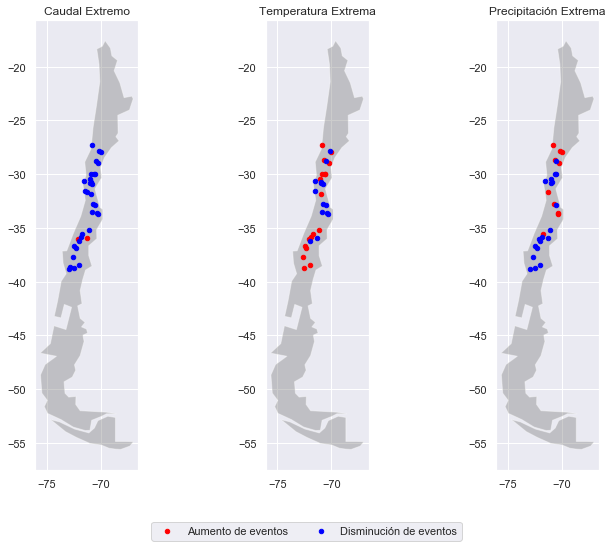

In [13]:
import geopandas
import geoplot
from shapely.geometry import Point
import matplotlib.pyplot as plt

# se generan los Point que son necesarios para plotear en un mapa
variaciones['geometry'] = variaciones[['longitud', 'latitud']].values.tolist()
variaciones['geometry'] = variaciones['geometry'].apply(Point)

# se filtran las medidas que tengan menos de 50 anios de medidas
variaciones = variaciones[(variaciones['cantidad_anios_medidas']>=50)]

# se lee el mapa de chile
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
chile = world[world.name == 'Chile']

# se genera el GeoDataFrame con el dataset de las variaciones
geo_df = geopandas.GeoDataFrame(variaciones)

# se plotean en 3 figures los caudas, temperaturas y precipitaciones extremas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
chile.plot(ax = ax1, alpha = 0.4, color= "grey")
chile.plot(ax = ax2, alpha = 0.4, color= "grey")
chile.plot(ax = ax3, alpha = 0.4, color= "grey")
geo_df[geo_df['caudal_extremo']>1].plot(ax= ax1, markersize = 20, color= "red", marker = "o")
geo_df[geo_df['caudal_extremo']<=0].plot(ax= ax1, markersize = 20, color= "blue", marker = "o")

geo_df[geo_df['temp_extremo']>1].plot(ax= ax2, markersize = 20, color= "red", marker = "o")
geo_df[geo_df['temp_extremo']<=0].plot(ax= ax2, markersize = 20, color= "blue", marker = "o")

geo_df[geo_df['precip_extremo']>3].plot(ax= ax3, markersize = 20, color= "red", marker = "o")
geo_df[geo_df['precip_extremo']<1].plot(ax= ax3, markersize = 20, color= "blue", marker = "o")

ax1.set_title('Caudal Extremo')
ax2.set_title('Temperatura Extrema')
ax3.set_title('Precipitación Extrema')

plt.figlegend(['Aumento de eventos','Disminución de eventos'], loc = 'lower center', ncol=5, labelspacing=0. )

Se visualiza que hay bajas en las medidas de caudales extremos y de precipitación extrema a lo largo de Chile. También se evidencia una subida de eventos extremos en muchos lugares de Chile, en especial en el sur.

# 6. Análisis de eventos extremos

Para hacer un análisis de si se hacen más comunes estos eventos es mejor ocupar el Moving Average de modo de filtrar el "ruido" de la curva.

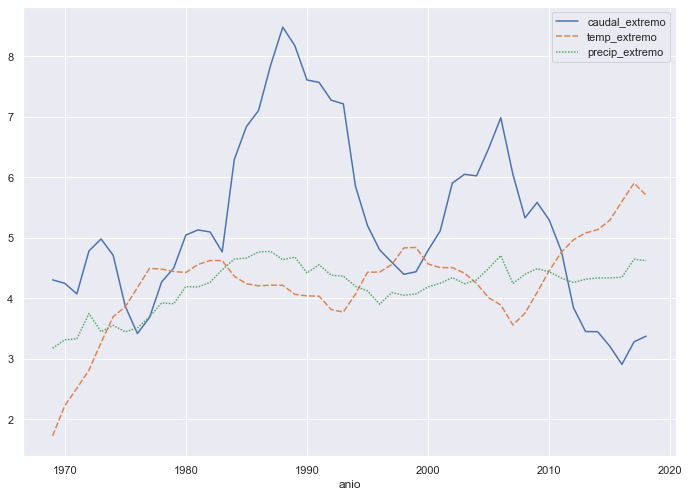

In [36]:
cuencas_valores_extremos_pct = data.groupby(['anio'])['caudal_extremo','temp_extremo','precip_extremo'].sum().divide(data.groupby(['anio'])['caudal_extremo','temp_extremo','precip_extremo'].count())*100
cuencas_valores_extremos_pct_sma = cuencas_valores_extremos_pct.rolling(window=10).mean()

# ax = sns.lineplot(data=cuencas_valores_extremos_pct) # si se quiere revisar sin MA se puede descomentar esta linea
ax = sns.lineplot(data=cuencas_valores_extremos_pct_sma)

La conclusión más clara coincide con los anterior: los eventos de caudal extremo están bajando y los de temperatura extrema están subiendo.

# 7. Predicción de caudal extremo

Para hacer la predicción de un evento de caudal extremo las variables a utilizar serán:

- $ Caudal_{t-1} $
- $ Precipitacion_{t-1} $
- $ Temperatura_{t-1} $

Se podría ocupar una ventana mayor de tiempo, pero por simplicidad y habiendo una correlación obvia entre las variables mencionadas y el evento de caudal extremo del siguiente día debería ser suficiente.

Además recordar que hay datos faltantes, lo cual será dañino en el proceso de predicción de caudal extremo, debido a que al hacer una ventana de tiempo es posible que se llegue a utilizar data de un período sin correlación con el efecto a analizar (por ejemplo si quiero predecir sábado, y tengo información del lunes, al hacer la ventana de tiempo puede que quede como t-1,t-2... el valor del lunes, que probablemente no tenga correlación con el efecto del sábado).
Por lo que al usar una ventana mayor de tiempo, hace más probable que lo anterior pase y se "ensucie" el dataset y el entrenamiento del modelo.

Obviamente no se pueden ocupar las variables en un tiempo t igual al que se hará la predicción (el mismo día) debido a que no sería una predicción per se.

Nota: Predecir el día siguiente con la información del día anterior es una propuesta simple y robusta, pero depende de como funcionen los instrumentos de medición, como se colecte la data y que tan pronto se necesite saber si ese día haya un evento con caudal extremo. Puede pasar que los instrumentos estén midiendo en tiempo real, pero que el sistema que haga la predicción los reciba con un desfase, y además puede haber necesidad de tener la predicción antes (el mismo día que va a ocurrir el evento sabría si será extremo o no).

Por ejemplo: los datos de precipitación y caudal máximo necesitan cerrar el día para determinar si fueron el máximo (la temperatura baja después de las ~17:00, por lo que se podría tener el valor máximo antes de cerrar el día), por lo que a las 00:00 se tendrían los datos y luego se entregarían al modelo para que genere una predicción del mismo día. ¿Es esto suficiente para la persona que ocupe la predicción?


Para normalizar se hará una división por los valores de los percentiles (excepto la precipitación, porque puede dar 0), ya que eso permite mantener los valores dentro de las escalas de los mismos ríos/estaciones.
Esto trae el problema de que obviamente hay valores que darán mayores que 1 y temperaturas negativas, lo cual afecta dependiendo del modelo.

Se podría utilizar algún tipo distinto de normalización, pero por simpleza se hizo así.

In [15]:
training_data = data

training_data['caudal_norm'] = data['caudal']/data['caudal_95']
training_data['temp_norm'] = data['temp_max_promedio']/data['temp_max_promedio_95']
training_data['precip_promedio_norm'] = data['precip_promedio']/data['precip_promedio_maximos']

# para generar el dataset del modelo solo tomare las medidas agrupadas por estacion y se har+a un shift
# de modo de generar el valor en t-1
training_data = training_data[['codigo_estacion','nombre','caudal','caudal_norm','temp_norm','precip_promedio_norm','caudal_extremo']].reset_index().set_index(['fecha','codigo_estacion'])
data_t_minus_one = training_data.groupby(level='codigo_estacion')['caudal_norm','temp_norm','precip_promedio_norm'].shift(1)

training_data.reset_index(inplace=True)
training_data = pd.merge(training_data, data_t_minus_one, how='left', on = ['fecha','codigo_estacion'], suffixes=('','_t_minus_one'))
training_data.set_index(['fecha','codigo_estacion'], inplace=True)

training_data.dropna(inplace=True)

# Análisis de resultado del modelo

Hay varias métricas que se pueden ocupar para evaluar el modelo (en especial en este caso de clasificación):

- Confusion Matrix
- ROC Curve
- Precision
- Recall
- AUC

Debido a que el problema indica: "Si quisiéramos capturar alrededor de un 70% de los eventos de caudales extremos. Cuál es la precisión de tu modelo con ese porcentaje de captura", uno podría decantarse a elegir la variable *precision*.
Pero hay que recordar la definición de precision:

- Precision: Ratio de verdaderos positivos con respecto a los positivos predichos. Dicho de forma breve, es la habilidad del clasificador de no marcar una muestra que es negativa como positiva.

O sea, es solo con respecto a los positivos predichos y no los reales. Usando recall:

- Recall: Ratio de verdaderos positivos con respecto a los positivos reales. Dicho de forma breve, es la habilidad del clasificador de identificar correctamente las muestras positivas.

Por lo tanto, dado las condiciones del problema, se utilizará el Recall como métrica para confirmar si el modelo nos es útil o no.
Para ello defino la siguiente función que determina todas las métricas útiles.

In [16]:
from sklearn import metrics

def generate_all_metrics(y_pred, y_pred_proba, y_test):
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    
    ax = sns.lineplot(x=fpr,y=tpr)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    tn, fp, fn, tp = cnf_matrix.ravel()
    
    modelo_util = 'SI' if recall >= 0.7 else 'NO'

    print(f'Confusion Matrix:')
    print(cnf_matrix)
    print(f'La precision es: {precision}')
    print(f'El recall es: {recall}')
    print(f'AUC (area bajo de la curva de la curva ROC) es de: {auc}')
    print(f'De los {y_test.sum()} eventos reales de caudal extremo fueron predichos correctamente {tp} eventos, lo cual corresponde a {recall*100}%')
    print(f'Debido a que es necesario predecir 70% de los casos reales este modelo {modelo_util} es útil')

# Datasets de entrenamiento y test

Se hará una repartición de 75/25 % de training/test sets

In [17]:
from sklearn.model_selection import train_test_split

feature_cols = ['caudal_norm_t_minus_one','temp_norm_t_minus_one','precip_promedio_norm_t_minus_one']
X = training_data[feature_cols] # Features
y = training_data.caudal_extremo # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Regresión Logística

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::,1]

Confusion Matrix:
[[295659   1479]
 [  5766  10089]]
La precision es: 0.8721473029045643
El recall es: 0.6363292336802271
AUC (area bajo de la curva de la curva ROC) es de: 0.9804331403158719
De los 15855 eventos reales de caudal extremo fueron predichos correctamente 10089 eventos, lo cual corresponde a 63.63292336802271%
Debido a que es necesario predecir 70% de los casos reales este modelo NO es útil


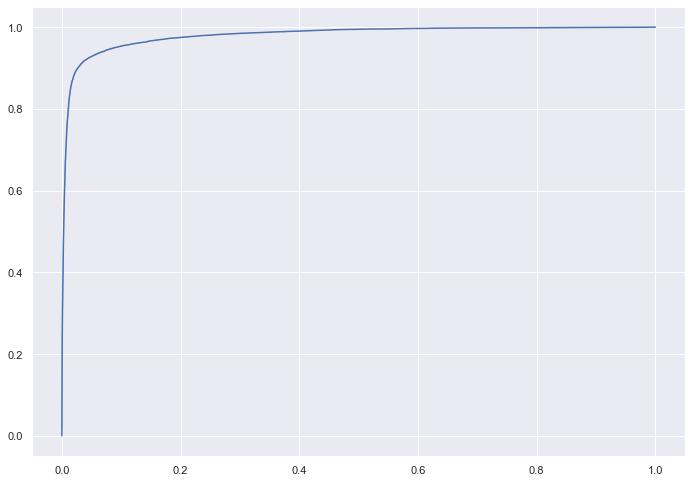

In [19]:
generate_all_metrics(y_pred, y_pred_proba, y_test)

# Otro algoritmo (XGBoost)

Debido a las limitaciones de la regresión logística clásica y a que es simple probar con otro algoritmo de clasificación ocuparé XGBoost (uno muy famoso en los últimos años).

In [20]:
from xgboost import XGBClassifier

model = XGBClassifier() # se usarán valores por default por simpleza
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[::,1]

y_pred = [round(value) for value in y_pred_proba]


Confusion Matrix:
[[294485   2653]
 [  3223  12632]]
La precision es: 0.8264311416421328
El recall es: 0.7967202775149795
AUC (area bajo de la curva de la curva ROC) es de: 0.985149210040046
De los 15855 eventos reales de caudal extremo fueron predichos correctamente 12632 eventos, lo cual corresponde a 79.67202775149795%
Debido a que es necesario predecir 70% de los casos reales este modelo SI es útil


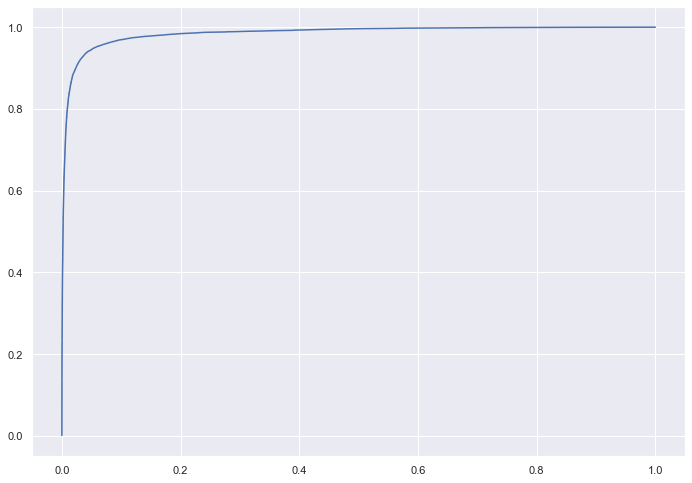

In [21]:
generate_all_metrics(y_pred, y_pred_proba, y_test)

Ideas para mejorar:
    * Hacer una ventana mayor (solo se consideró un día de ventana)
    * Analizar los eventos que se clasifican mal: Tal vez algunos de los caudales extremos no guardaban estricta relación con eventos de temperatura y precipitaciones del día anterior, ¿Que pasa si el peakflow se genera de la nada el mismo día? Habría sido imposible predecirlo con data del día anterior.
    * Hypertunning de parámetros: no se hizo hipertuneo de parámetros y tampoco se reviso el error del training set y test set para determinar si había overfit

In [34]:
# lo siguiente es solo para darle una mirada a los valores bien/mal predichos
test = X_test
test['predicted'] = pd.DataFrame({'predicted': y_pred}, index=X_test.index)['predicted']
test['real'] = pd.DataFrame({'real': y_test}, index=X_test.index)['real']
test[(test['real']==1) & (test['predicted']==1)]

C:\Users\Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,,caudal_norm_t_minus_one,temp_norm_t_minus_one,precip_promedio_norm_t_minus_one,predicted,real
fecha,codigo_estacion,,,,,
1967-05-21 00:00:00+00:00,7355002,1.502917,0.661417,0.000000,1.0,1
1984-07-16 00:00:00+00:00,5221002,3.980815,0.550388,0.000000,1.0,1
2005-05-29 00:00:00+00:00,8307002,1.682819,0.261044,0.305882,1.0,1
1965-10-16 00:00:00+00:00,4540001,1.100954,0.673130,0.000000,1.0,1
2006-08-10 00:00:00+00:00,10364001,0.973894,0.641916,0.289482,1.0,1
1984-12-07 00:00:00+00:00,4730001,1.439114,0.966443,0.000000,1.0,1
1973-01-24 00:00:00+00:00,4716004,1.225987,0.893750,0.000000,1.0,1
1972-12-18 00:00:00+00:00,3825001,2.413127,0.906040,0.000000,1.0,1
1984-11-07 00:00:00+00:00,3453001,2.098118,0.768182,0.000000,1.0,1
